# Show Sandal Boot Classification

## Outine
- Prepare Notebook
- Load and Preprocess Dataset
- Config GPU
- Model Traning
- Evaluation
- Testing

### Prepare Notebook

In [1]:
import os
import time
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms


import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_DIR = '/kaggle/input/shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset'

### Load and Preprocess Dataset

In [3]:
dataTransform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomCrop(110),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(root = DATA_DIR, transform = dataTransform)
classNames = dataset.classes
print(f'Size of Dataset: {len(dataset)}')

Size of Dataset: 15000


In [4]:
def plotImage(num):
    img, label = dataset[num]
    plt.imshow(img.permute((1, 2, 0)))
    print(img.size())
    print(label)

torch.Size([3, 110, 110])
0


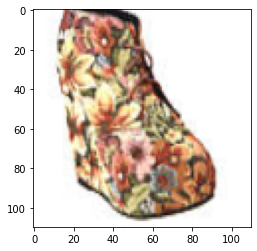

In [5]:
plotImage(655)

torch.Size([3, 110, 110])
1


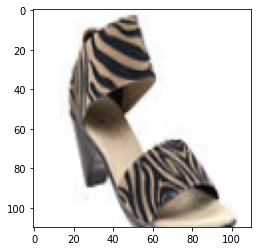

In [6]:
plotImage(9999)

torch.Size([3, 110, 110])
2


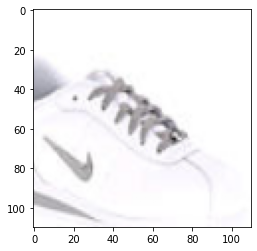

In [7]:
plotImage(13456)

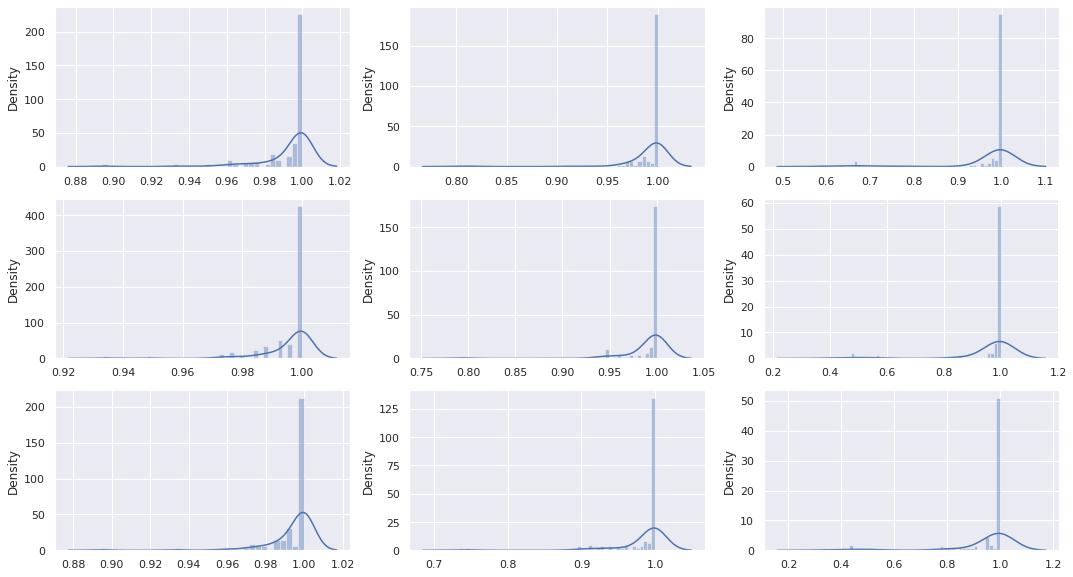

In [8]:
img, label = dataset[0]

sns.set(rc={"figure.figsize":(18, 10)})
fig, ax = plt.subplots(nrows = 3, ncols = 3)
for i in range(3):
    for j in range(3):
        sns.distplot(img[i][j], ax = ax[i][j], hist = True)

In [9]:
valSize = int(len(dataset) * 0.1)
trainSize = int(len(dataset) - valSize)

train_ds, val_ds = torch.utils.data.random_split(dataset, [trainSize, valSize], generator = torch.manual_seed(4))

len(train_ds), len(val_ds)

(13500, 1500)

In [10]:
BATCH_SIZE = 64

trainLoader = torch.utils.data.DataLoader(train_ds, BATCH_SIZE, shuffle = True)
valLoader = torch.utils.data.DataLoader(val_ds, BATCH_SIZE, shuffle = True)

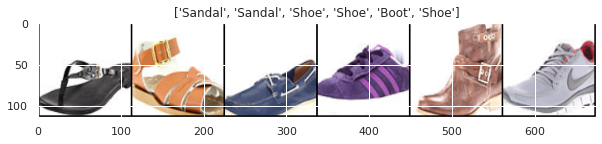

In [11]:
import matplotlib.pyplot as plt
def imshow(inp,title = None):
    inp = inp.numpy().transpose((1,2,0))
    plt.figure(figsize = (10, 6))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    

inputs, classes = next(iter(valLoader))
out = torchvision.utils.make_grid(inputs[0 : 6])
imshow(out, title = [classNames[x] for x in classes[0:6]])